# ANN Based Fault Detection

In this code I have implemented an Artificial Neural Network based power system line faults detection. In this notebook, a  Multi-layer perceptron (MLP) Classifier is implemented which uses Backpropagation. The data used is a time series data which was generated in MATLAb. Two target values 0 and 1 are used to create binary classes. When 0 is identified then there is no fault and 1 shows fault is detected. The data consist of different features and only six features (3-phase current and voltage measurements are used to train the MLP model). The code can be divided into following steps

1. Data is read, preprocessed, and statistically analyzed.

2. After pre-processing the data is splitted into test, train, and predict datasets

3. MLP classifier model is trained with trainning dataset, tested, and predicted with seperated data which was not used in training process.

4. Results of MLP classifier

5. Data Visualization


### Reading Data

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, classification_report
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('dataset.csv',sep=';').fillna(0)
data

,time,Class,Ia,Ib,Ic,Va,Vb,Vc,Ia_fault,Ib_fault,Ic_fault,Va_fault,Vb_fault,Vc_fault
0,0.0000,0,129.994111,53.802915,-183.797026,-42.974767,-17.794578,60.769346,0.000000e+00,0.000000e+00,0.0,-114.817022,-167.248389,282.065411
1,0.0005,0,106.978791,81.428488,-188.407279,-35.364709,-26.927933,62.292642,0.000000e+00,0.000000e+00,0.0,-72.865422,-200.986746,273.852168
2,0.0010,0,81.327779,107.060118,-188.387898,-26.883352,-35.401902,62.285254,0.000000e+00,0.000000e+00,0.0,-29.105315,-229.791633,258.896948
3,0.0015,0,53.674058,130.064350,-183.738408,-17.739989,-43.007059,60.747048,0.000000e+00,0.000000e+00,0.0,15.350725,-252.935879,237.585154
4,0.0020,0,24.698475,149.873540,-174.572014,-8.159732,-49.555744,57.715476,0.000000e+00,0.000000e+00,0.0,59.451283,-269.869922,210.418640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48001,3.9980,0,185.646874,-63.079491,-122.567401,-61.378359,20.849761,40.528604,2.417088e-11,-3.409152e-15,0.0,-245.235535,-0.517015,245.752598
48002,3.9985,0,177.988872,-34.465159,-143.523731,-58.845484,11.388893,47.456597,2.329766e-11,-2.235898e-15,0.0,-219.973480,-44.854044,264.827572
48003,3.9990,0,165.948055,-5.002045,-160.946027,-54.863592,1.647548,53.216050,2.185102e-11,-9.978573e-16,0.0,-189.296312,-88.089779,277.386139
48004,3.9995,0,149.820907,24.584369,-174.405294,-49.530731,-8.134409,57.665145,1.986608e-11,2.553366e-16,0.0,-153.956585,-129.153529,283.110162


### Data pre-processing & Statistical Analysis

In [3]:
data=data.iloc[:,1:]
data.describe()

,Class,Ia,Ib,Ic,Va,Vb,Vc,Ia_fault,Ib_fault,Ic_fault,Va_fault,Vb_fault,Vc_fault
count,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000
mean,0.050015,0.017509,0.005570,-0.023181,-0.005789,-0.001842,0.007664,0.088589,-0.090463,0.016018,-0.098934,0.017928,0.006431
std,0.217977,131.087285,131.521388,132.064150,43.340733,43.484259,43.663710,16.578074,15.733291,13.667301,197.249017,198.619739,199.991167
min,0.000000,-189.105718,-189.869890,-190.719410,-62.840225,-62.907516,-62.491610,-131.960904,-154.064842,-142.696349,-426.973891,-425.475872,-425.290509
25%,0.000000,-130.012215,-129.915253,-122.666792,-42.979768,-42.958934,-40.552316,0.000000,0.000000,0.000000,-189.298339,-200.086303,-190.063088
50%,0.000000,-0.805066,0.654517,0.159134,0.266175,-0.216401,-0.052609,0.000000,0.000000,0.000000,-0.001007,-0.002955,0.002929
75%,0.000000,130.009237,129.918777,122.667892,42.980752,42.957769,40.551953,0.000000,0.000000,0.000000,189.300067,200.082404,190.062609
max,1.000000,190.065051,190.268421,189.012001,62.522889,62.775779,63.056705,162.813358,132.041476,131.991719,425.783758,426.217889,425.334577


In [4]:
X=data.iloc[:,1:7]
Y=data.iloc[:,0]

In [5]:
X.describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000,48006.000000
mean,0.017509,0.005570,-0.023181,-0.005789,-0.001842,0.007664
std,131.087285,131.521388,132.064150,43.340733,43.484259,43.663710
min,-189.105718,-189.869890,-190.719410,-62.840225,-62.907516,-62.491610
25%,-130.012215,-129.915253,-122.666792,-42.979768,-42.958934,-40.552316
50%,-0.805066,0.654517,0.159134,0.266175,-0.216401,-0.052609
75%,130.009237,129.918777,122.667892,42.980752,42.957769,40.551953
max,190.065051,190.268421,189.012001,62.522889,62.775779,63.056705


In [6]:
Y.describe()

count    48006.000000
mean         0.050015
std          0.217977
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

### Splitting data into train, test, and predict dataset

In [7]:
X,data_val_X,Y,data_val_Y = train_test_split(X, Y, train_size=0.8,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7,random_state=1)

### Training MLP classifier with three layers MLP classifier with 6neutron x 5neutron x 3neutron

The model acheived an accuracy of upto 99% and the confusion matrix also shows the number of True positive = 10935 and True negative = 495, against False positive =12 and False negative = 80

Training Score: 0.9912208913027305
Test Score: 0.991494532199271
CV Score: 0.9845514355868884


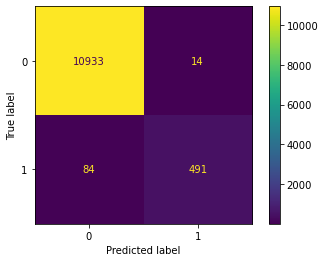

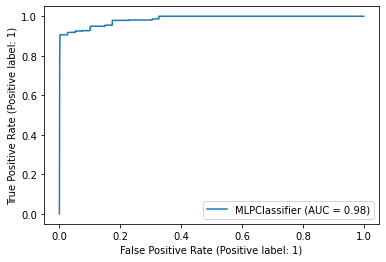

In [8]:
clf = MLPClassifier(activation='relu', hidden_layer_sizes=(6,5,3),max_iter=500)
clf.fit(X_train, y_train)
print("Training Score:", clf.score(X_train,y_train))
print("Test Score:", clf.score(X_test,y_test))
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("CV Score:", np.mean(scores))
metrics.ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)
plt.show()
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

### Calculating accuracy of predit dataset and plotting confusion matrix

Validation Score: 0.989897937929598
Cross validation Score: 0.9695907079646018


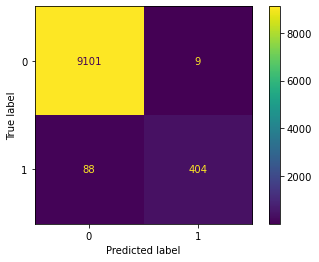

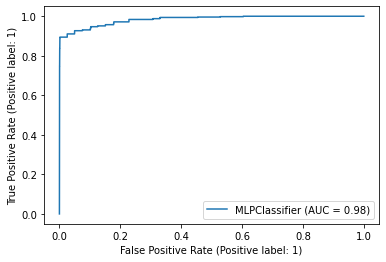

In [9]:
y_pred=clf.predict(data_val_X)
print("Validation Score:",clf.score(data_val_X,data_val_Y) )
scores = cross_val_score(clf, data_val_X,data_val_Y, cv=5)
print("Cross validation Score:", np.mean(scores))
metrics.ConfusionMatrixDisplay.from_estimator(clf,data_val_X,data_val_Y)
plt.show()
svc_disp = RocCurveDisplay.from_estimator(clf, data_val_X, data_val_Y)

### Precision and accuracy of MLP model

In [10]:
print(classification_report(data_val_Y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9110
           1       0.98      0.82      0.89       492

    accuracy                           0.99      9602
   macro avg       0.98      0.91      0.94      9602
weighted avg       0.99      0.99      0.99      9602



## Data Visualization in 2D and 3D

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_train)
XR_test = pca.fit_transform(X_test)


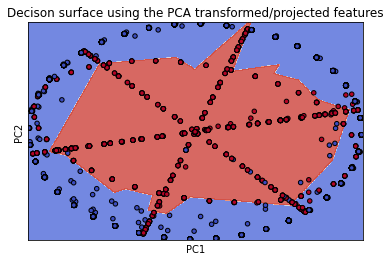

<Figure size 720x576 with 0 Axes>

In [14]:
def make_meshgrid(x, y, h=1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = clf.fit(Xreduced, y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of RBF SVC ')

# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plt.figure(figsize=(10, 8))

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
#ax.legend()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=3)
Xreduced = pca.fit_transform(X_train)
XR_test = pca.fit_transform(X_test)
XR_predict = pca.fit_transform(data_val_X)

X0, X1, X2 = Xreduced[:, 0], Xreduced[:, 1],Xreduced[:, 2]

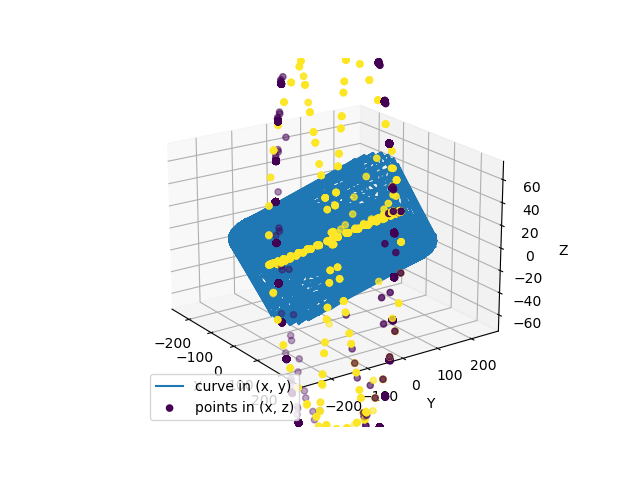

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

ax = plt.figure().add_subplot(projection='3d')

ax.plot(X0, X1,X2, zdir='z', label='curve in (x, y)')

ax.scatter(X0, X1, X2, zdir='y',c=y_train,label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=20., azim=-35)

plt.show()

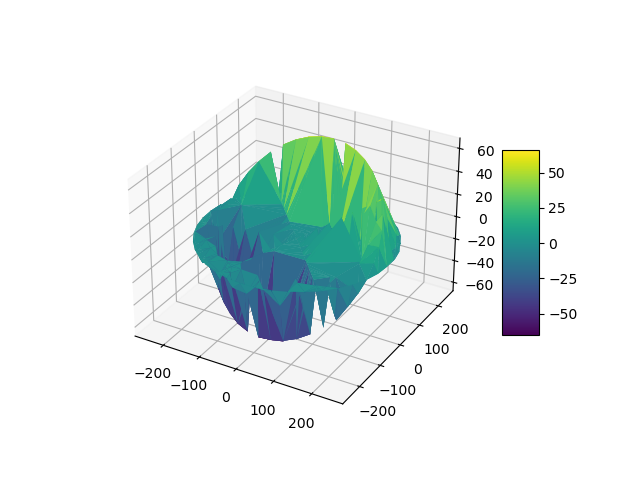

In [17]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X0,X1,X2, cmap=plt.cm.viridis, linewidth=0.2)
surf=ax.plot_trisurf(X0,X1,X2, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
